In [235]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn  as sns
sns.set(color_codes=True)

import mglearn

In [236]:
iris = pd.read_csv(r"C:\Users\HH\Desktop\DataScience\iris\iris.data")

In [237]:
iris.keys()

Index(['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'], dtype='object')

In [238]:
iris.columns = ["sepal length","sepal width","petal length","petal width","class"]

In [239]:
iris.keys()

Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'class'], dtype='object')

In [240]:
iris.head()
#iris.drop(['Id'], axis=1) eğer id varsa

,sepal length,sepal width,petal length,petal width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [241]:
iris.describe()

,sepal length,sepal width,petal length,petal width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [242]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
sepal length    149 non-null float64
sepal width     149 non-null float64
petal length    149 non-null float64
petal width     149 non-null float64
class           149 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [243]:
iris.head() 

,sepal length,sepal width,petal length,petal width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [244]:
iris.groupby("class").size()

class
Iris-setosa        49
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [245]:
iris['class'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        49
Name: class, dtype: int64

In [246]:
iris['class'].groupby(iris['petal width']).value_counts()


petal width  class          
0.1          Iris-setosa         6
0.2          Iris-setosa        27
0.3          Iris-setosa         7
0.4          Iris-setosa         7
0.5          Iris-setosa         1
0.6          Iris-setosa         1
1.0          Iris-versicolor     7
1.1          Iris-versicolor     3
1.2          Iris-versicolor     5
1.3          Iris-versicolor    13
1.4          Iris-versicolor     7
             Iris-virginica      1
1.5          Iris-versicolor    10
             Iris-virginica      2
1.6          Iris-versicolor     3
             Iris-virginica      1
1.7          Iris-versicolor     1
             Iris-virginica      1
1.8          Iris-virginica     11
             Iris-versicolor     1
1.9          Iris-virginica      5
2.0          Iris-virginica      6
2.1          Iris-virginica      6
2.2          Iris-virginica      3
2.3          Iris-virginica      8
2.4          Iris-virginica      3
2.5          Iris-virginica      3
Name: class, dtype: int64

In [247]:
iris['class'].groupby(pd.qcut(iris['petal width'], 3)).value_counts()

petal width   class          
(0.099, 1.0]  Iris-setosa        49
              Iris-versicolor     7
(1.0, 1.6]    Iris-versicolor    41
              Iris-virginica      4
(1.6, 2.5]    Iris-virginica     46
              Iris-versicolor     2
Name: class, dtype: int64

In [248]:
iris['petal_area'] = iris.apply(lambda row: (row['petal length'] * row['petal width']), axis=1)

In [249]:
iris.head()

,sepal length,sepal width,petal length,petal width,class,petal_area
0,4.9,3.0,1.4,0.2,Iris-setosa,0.28
1,4.7,3.2,1.3,0.2,Iris-setosa,0.26
2,4.6,3.1,1.5,0.2,Iris-setosa,0.30
3,5.0,3.6,1.4,0.2,Iris-setosa,0.28
4,5.4,3.9,1.7,0.4,Iris-setosa,0.68


In [250]:
iris['sepal_area'] = iris.apply(lambda row: (row['sepal length'] * row['sepal width']), axis=1)

In [251]:
iris.head()

,sepal length,sepal width,petal length,petal width,class,petal_area,sepal_area
0,4.9,3.0,1.4,0.2,Iris-setosa,0.28,14.70
1,4.7,3.2,1.3,0.2,Iris-setosa,0.26,15.04
2,4.6,3.1,1.5,0.2,Iris-setosa,0.30,14.26
3,5.0,3.6,1.4,0.2,Iris-setosa,0.28,18.00
4,5.4,3.9,1.7,0.4,Iris-setosa,0.68,21.06


# Visualization

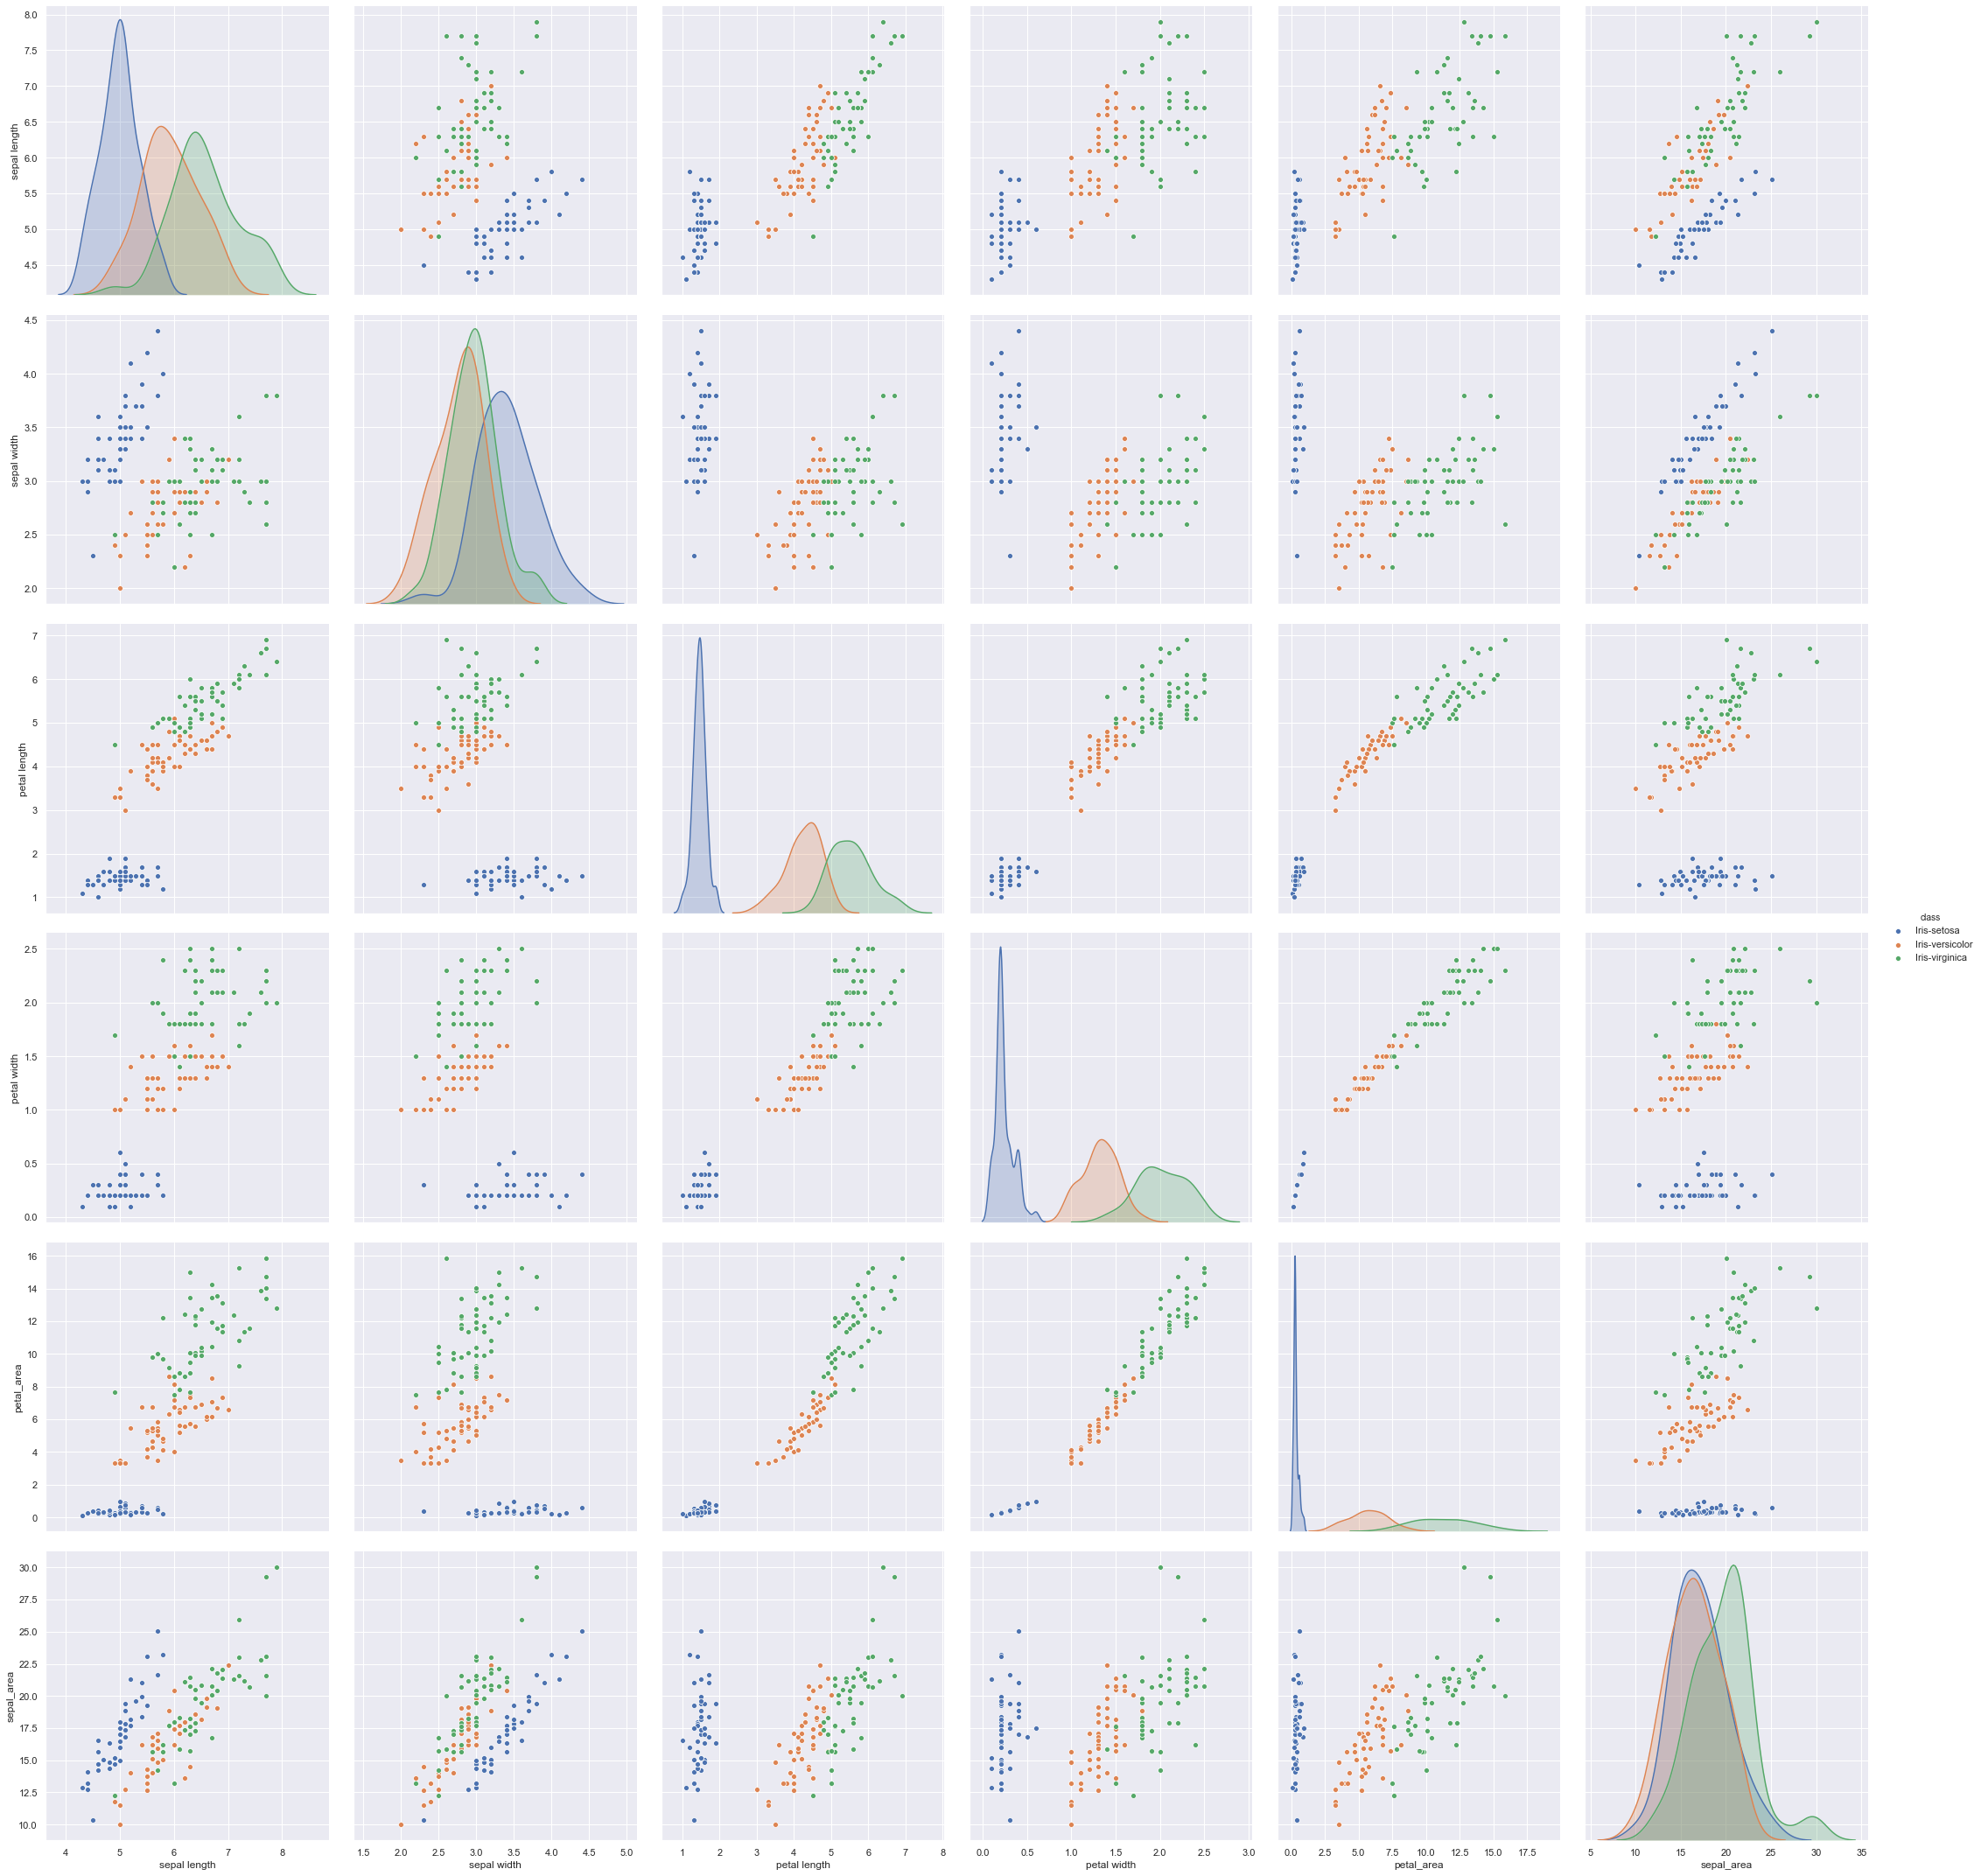

In [252]:
sns.pairplot(iris, hue='class', height=5)

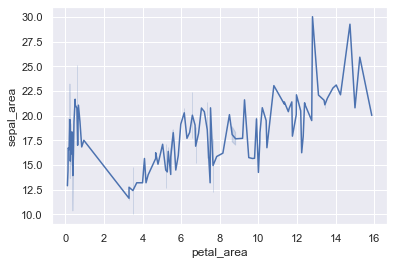

In [253]:
sns.lineplot(iris['petal_area'], iris['sepal_area'])

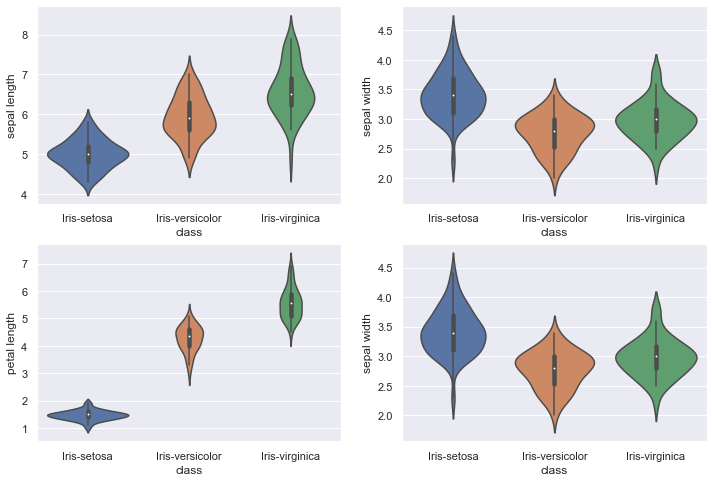

In [254]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.violinplot(x="class", y="sepal length", data=iris)
plt.subplot(2,2,2)
sns.violinplot(x="class", y="sepal width", data=iris)
plt.subplot(2,2,3)
sns.violinplot(x="class", y="petal length", data=iris)
plt.subplot(2,2,4)
sns.violinplot(x="class", y="sepal width", data=iris)

In [255]:
iris = pd.read_csv(r"C:\Users\HH\Desktop\DataScience\iris\iris.data") #same

from sklearn.datasets import load_iris                                #same
iris = load_iris()  

In [256]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [257]:
# unique targets
print("Unique targets:", np.unique(iris.target)) # [0, 1, 2]
# counts of each target
print("Bin counts for targets:", np.bincount(iris.target))

Unique targets: [0 1 2]
Bin counts for targets: [50 50 50]


In [258]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris['data'], 
    iris['target'], 
    train_size=0.75,
    test_size=0.25,
    random_state=0)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002AA190A8860>,
      dtype=object)

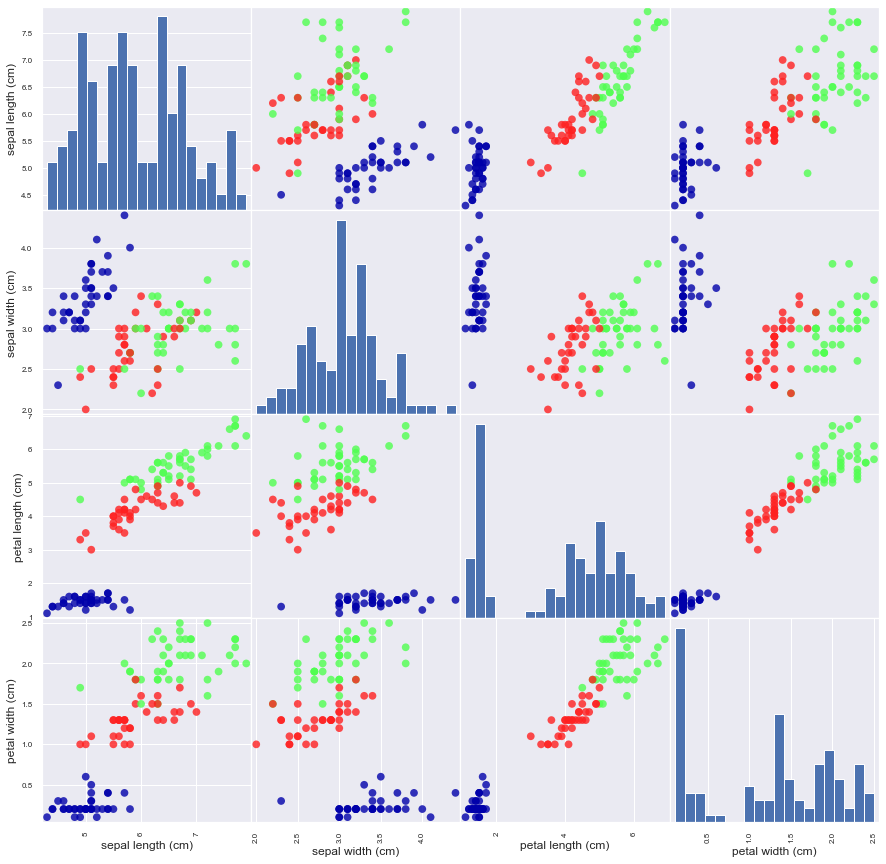

In [259]:
iris_dataframe = pd.DataFrame(X_train, columns=iris.feature_names)
# create a scatter matrix from the dataframe, color by y_train
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15),
                           marker='o', hist_kwds={'bins': 20}, s=60,
                           alpha=.8
                           ,cmap=mglearn.cm3
                          )

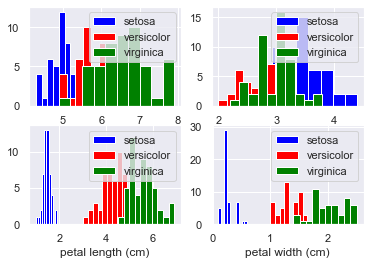

In [260]:
colors = ['blue', 'red', 'green']
# plot histogram
for feature in range(iris.data.shape[1]): # (shape = 150, 4)
    plt.subplot(2, 2, feature+1) # subplot starts from 1 (not 0)
    for label, color in zip(range(len(iris.target_names)), colors):
        # find the label and plot the corresponding data
        plt.hist(iris.data[iris.target==label, feature],
                 label=iris.target_names[label],
                 color=color)
    plt.xlabel(iris.feature_names[feature])
    plt.legend()
plt.show()

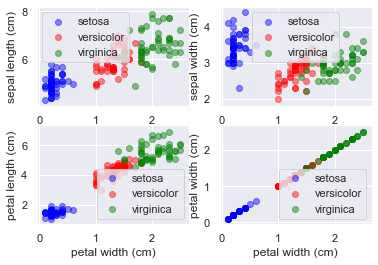

In [261]:
# plot scatter plot : petal-width vs all features
feature_x= 3 # petal width
for feature_y in range(iris.data.shape[1]):
    plt.subplot(2, 2, feature_y+1) # subplot starts from 1 (not 0)
    for label, color in zip(range(len(iris.target_names)), colors):
        # find the label and plot the corresponding data
        plt.scatter(iris.data[iris.target==label, feature_x],
                    iris.data[iris.target==label, feature_y],
                    label=iris.target_names[label],
                    alpha = 0.45, # transparency
                    color=color)
    plt.xlabel(iris.feature_names[feature_x])
    plt.ylabel(iris.feature_names[feature_y])
    plt.legend()
plt.show()

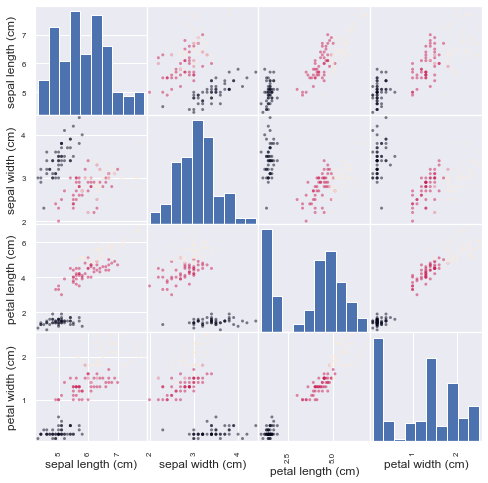

In [262]:
# create Pandas-dataframe
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
# print(iris_df.head())
pd.plotting.scatter_matrix(iris_df, c=iris.target, figsize=(8, 8));
plt.show()

# Iris flower prediction with scikit-learn

In [263]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [264]:
iris.data[:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [265]:
iris.target     #same
iris["target"]  #same

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [266]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [267]:
type(iris)

sklearn.utils.Bunch

In [268]:
iris.data.shape

(150, 4)

In [269]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris['data'], 
    iris['target'], 
    train_size=0.75,
    test_size=0.25,
    random_state=0)

In [270]:
print(X_train.shape)
print(y_train.shape)

(112, 4)
(112,)


In [271]:
print(X_test.shape)
print(y_test.shape)

(38, 4)
(38,)


In [272]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)

In [273]:
knn.fit(X_train, y_train )

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

In [274]:
import numpy as np
iris_new = np.array([[3, 2.9, 2, 0.2]])
print("iris_new.shape:", iris_new.shape)

iris_new.shape: (1, 4)


In [275]:
prediction = knn.predict(iris_new)
print(prediction)
print(iris['target_names'][prediction])

[0]
['setosa']


In [276]:
test_predict = knn.predict(X_test)
print("Test set predictions:\n", test_predict)

Test set predictions:
 [2 1 0 2 0 2 0 2 2 1 2 1 1 1 1 0 1 1 0 0 1 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [277]:
print("Test set score: {:.2f}".format(np.mean(test_predict == y_test)))

Test set score: 0.89


# Fit a model and test accuracy

### Fit a model and test accuracy

In [278]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris() # load the iris dataset

# save 'features' and 'targets' in X and y respectively
X, y = iris.data, iris.target

# split data into 'test' and 'train' data
train_X, test_X, train_y, test_y = train_test_split(X, y,
        train_size=0.5,
        test_size=0.5,
        random_state=23,
        stratify=y
    )

# select classifier
cls = KNeighborsClassifier()
cls.fit(train_X, train_y)

# predict the 'target' for 'test data'
pred_y = cls.predict(test_X)
test_accuracy = accuracy_score(test_y, pred_y)
print("Accuracy for test data:", test_accuracy)

Accuracy for test data: 0.9466666666666667


### Plot the incorrect prediction

Wrongly detected samples: [11 48 66 72]


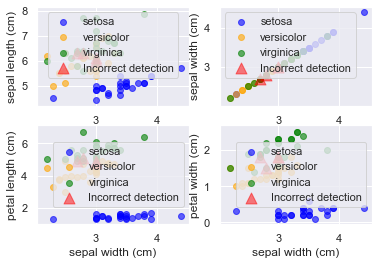

In [279]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris() # load the iris dataset
X, y = iris.data, iris.target # save 'features' and 'targets' in X and y respectively

# split data into 'test' and 'train' data
train_X, test_X, train_y, test_y = train_test_split(X, y,
        train_size=0.5,
        test_size=0.5,
        random_state=23,
        stratify=y
    )

# select classifier
cls = KNeighborsClassifier()
cls.fit(train_X, train_y)


pred_y = cls.predict(test_X) # predict the 'target' for 'test data'
# test_accuracy = accuracy_score(test_y, pred_y)
# print("Accuracy for test data:", test_accuracy)

incorrect_idx = np.where(pred_y != test_y)
print('Wrongly detected samples:', incorrect_idx[0])

# scatter plot to show correct and incorrect prediction
# plot scatter plot : sepal-width vs all features
colors = ['blue', 'orange', 'green']
feature_x= 1 # sepal width
for feature_y in range(iris.data.shape[1]):
    plt.subplot(2, 2, feature_y+1) # subplot starts from 1 (not 0)
    for i, color in enumerate(colors):
        # indices for each target i.e. 0, 1 & 2
        idx = np.where(test_y == i)[0]
        # find the label and plot the corresponding data
        plt.scatter(test_X[idx, feature_x],
                    test_X[idx, feature_y],
                    label=iris.target_names[i],
                    alpha = 0.6, # transparency
                    color=color
                    )

    # overwrite the test-data with red-color for wrong prediction
    plt.scatter(test_X[incorrect_idx, feature_x],
            test_X[incorrect_idx, feature_y],
            color="red",
            marker='^',
            alpha=0.5,
            label="Incorrect detection",
            s=120 # size of marker
            )

    plt.xlabel('{0}'.format(iris.feature_names[feature_x]))
    plt.ylabel('{0}'.format(iris.feature_names[feature_y]))
    plt.legend()
plt.show()

In [281]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])